# Advertisement
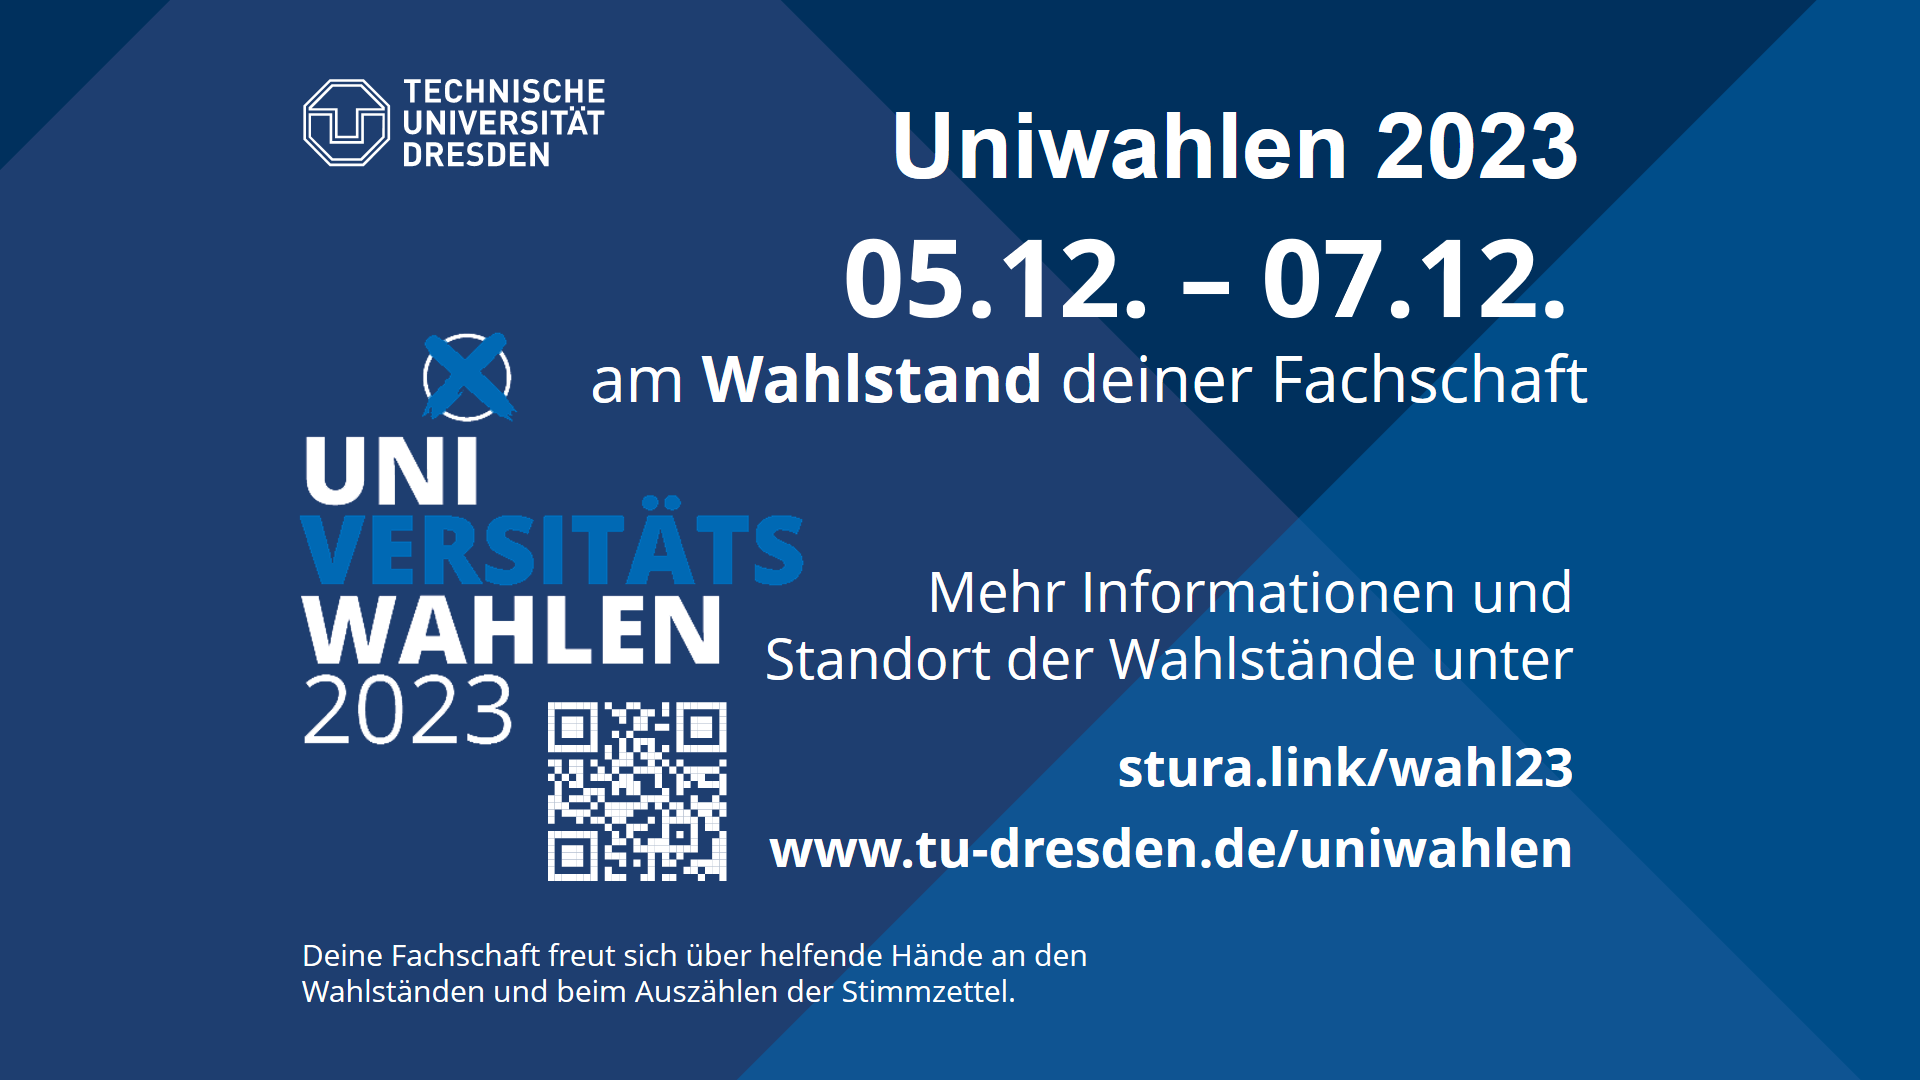

In [3]:
pip install plotly_express

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
  Obtaining dependency information for plotly>=4.1.0 from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Using cached plotly-5.18.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached statsmodels-0.14.1.tar.gz (20.3 MB)
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [2155 lines of output]
      Compiling statsmodels/tsa/stl/_stl.pyx because it changed.
      Compiling statsmodels/tsa/holtwinters/_exponential_smoothers.pyx because it changed.
      Compiling statsmodels/tsa/exponential_smoothing/_ets_smooth.pyx because it changed.
      Compiling statsmodels/tsa/_innovations.pyx because it changed.
      Compiling statsmodels/tsa/regime_switching/_hamilton_filter.pyx because it changed.
      Compiling statsmodels/tsa/regime_switching/_kim_smoother.pyx because it changed.
      Compiling statsmodels/tsa/innovations/_arma_innovations.pyx because it changed.
      Compiling statsmodels/nonparametric/linbin.pyx because it changed.
      Compiling statsmodels/robust/_qn.pyx because it changed.
      Compiling statsmodels/nonparametric/_smoothers_lowess.pyx because it changed.
      Compiling statsmodels/tsa/statespace/_initi

Note: you may need to restart the kernel to use updated packages.


# General Imports

In [4]:
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'plotly_express'

# Task Nr. 1

In [ ]:
# Use Semicolon as separator
data = pd.read_csv("data_ex1.csv", index_col=0, sep = ";")
data.head()

In [ ]:
# Use coma as Separator
data = pd.read_csv("data_ex1.csv", index_col=0, sep = ",")
data.head()

# Task Nr. 2

In [ ]:
data.info(show_counts = True)

# Task Nr. 3

In [ ]:
from datetime import datetime as dt

def String2Date(data):
    # dates= [dt.strptime(" ".join((data.Date[d], str(data.Hour[d]))), "%d/%m/%Y %H") for d in data.index]
    dates= [dt.strptime(data.Date[d], "%d/%m/%Y") for d in data.index]
    return dates

data["Date"]=String2Date(data)
data.head()

# Task Nr. 4

In [ ]:
function_dictionary = {"Humidity": np.nanmean, "Temperature": np.nanmean}
data.groupby("Date").aggregate(function_dictionary)

# Task Nr. 5

In [ ]:
data["Weekday"]= data.Date.dt.day_name()
by_wd=data.groupby("Weekday").sum()
sns.barplot(x=by_wd.index, y=by_wd["Rented_Bike_Count"])
plt.show()
#Low on Sunday, top on Friday, high on weekdays

# Task Nr. 6

In [ ]:
data['Day_Night']=data['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
plt.bar(x=data.Day_Night, height=data.Rented_Bike_Count)
plt.show()
#More at daytime

# Task Nr. 7

In [ ]:
#First Col -> Hotness
print(round(data.Hotness.isna().sum()/len(data.Hotness) *100, 2))
print(data[["Hotness", "Temperature"]].corr())
data.drop("Hotness", axis = 1, inplace = True)

#second Col -> Dew_point_temperature
print(data[["Temperature", "Dew_point_temperature"]].corr())
data.drop("Dew_point_temperature", axis= 1, inplace=True)

# Task Nr. 8

In [ ]:
print(data.isna().sum())
# Option A: Delete col with missing value -> rarely useful
# data.dropna(axis=1, inplace=True)
# Option B. Delete row with missing value ->
# data.dropna(axis=0, inplace=True)
# len(data)
# Option C: filling the value with an imputed value
NA_inds=data[data.isna().any(axis=1)].copy().index

In [ ]:
# all rows that contain an NA
data.iloc[NA_inds,:]

In [ ]:
#check distribution of Visibility to decide upon the best course of action
px.histogram(data, x="Visibility")

In [ ]:
# Prüfung der Mittleren Werte
print(f'Mean:\n{round(data["Visibility"].mean(),2)}\nMedian:\n{data["Visibility"].median()}\nMode:\n{data["Visibility"].mode()[0]}')
# so genannter f-string: erlaubt Funktionen in Strings auszuführen
# beachte: string muss mit '' sein. "" geht nicht


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
# Entscheidung -> Median
SI= SimpleImputer(strategy="median") #mgl. mean, median, most_frequent (=mode), constant (fill_value)  
Vis=SI.fit(data[["Visibility"]])
data["Visibility"]=Vis.transform(data[["Visibility"]])
data["Wind_speed"]=SI.fit_transform(data[["Wind_speed"]])

In [ ]:
KNNI= KNNImputer(n_neighbors=3, weights="distance")
data["Humidity"]=KNNI.fit_transform(data[["Humidity"]])

In [ ]:
# Werte gefüllt
data.iloc[NA_inds,:]

# Task Nr. 9

In [ ]:
import numpy as np
#data.Solar_Radiation.value_counts()
inds=list(np.where(data.Solar_Radiation=="failure")[0])
data.iloc[inds,8]
#Remove??
#data.drop("Solar_Radiation", axis=1, inplace=True)
#data.loc[data.Solar_Radiation =="failure","Solar_Radiation"] = np.NaN

data["Solar_Radiation"]=data["Solar_Radiation"].apply(lambda val: np.NaN if (val=="failure") else(float(val.replace(",", "."))))
data["Solar_Radiation"]=SI.fit_transform(data[["Solar_Radiation"]])


# Task Nr. 10

In [ ]:
inds = list(np.where(data.Temperature>100)[0])

data.iloc[inds,3] /= 10
data.iloc[inds,:][:5]

# data.loc[data.Temperature>100,"Temperature"] /= 10
# data[data.Temperature==23.4]

In [ ]:
fig2= px.scatter(data, "Rented_Bike_Count", "Temperature", color= data.Temperature==23.4)
fig2= fig2.add_hrect(y0=data.Temperature.mean()+10, y1=data.Temperature.mean()-10, line_width=0, fillcolor="red", opacity=0.2)
fig2= fig2.add_hline(y= data.Temperature.mean())
fig2.show()
#mittelwertlinie einzeichnen

# Task Nr. 11

In [ ]:
data.Seasons.value_counts()
data.loc[data.Seasons=="Herbst","Seasons"] = "Autumn"
data.loc[data.Functioning_Day == "Yes", "Functioning_Day"] = 1
data["Functioning_Day"]=data.Functioning_Day.astype(int)
data["Functioning_Day"]=data.Functioning_Day.astype(bool)
data.dtypes

In [ ]:
# data.drop("Holiday", axis=1, inplace=True) 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Seasons"]=le.fit_transform(data["Seasons"])
data["Weekday"]=le.fit_transform(data["Weekday"])
print(le.classes_)
data["Day_Night"]=le.fit_transform(data["Day_Night"])
data["Holiday"]=le.fit_transform(data["Holiday"])

In [ ]:
data.head()

In [ ]:
round(data.corr(),2)["Rented_Bike_Count"]

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())

In [ ]:
# Month als spalte
data["Month"]=data.Date.dt.month

# Task Nr. 12

In [ ]:
from sklearn.model_selection import train_test_split
# Columns mit correlation >=0.2 außer Solar_Radiation, da Correlation mit Temperature
x=data[["Hour", "Temperature", "Humidity", "Visibility", "Rainfall", "Seasons"]]
y=data["Rented_Bike_Count"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=78)
# Warum könnte man nicht einfach die letzten x Zeilen als Testset nehmen? ;)

------------------------------------------------------------

In [ ]:
by_month = data.groupby(data.Date.dt.month).mean()
fig3= px.line(by_month, x=by_month.index, y="Rented_Bike_Count", 
labels={
    "Date":"Month"
})

fig3.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig6 = make_subplots(rows=1, cols=3, subplot_titles=("Rain", "Snow", "Viz"))

fig6.add_trace(
    go.Scatter(x=data.Rented_Bike_Count, y=data.Rainfall, name="Rainfall", mode='markers'),row=1, col=1
    )
fig6.add_trace(
    go.Scatter(x=data.Rented_Bike_Count, y=data.Snowfall,name="Snowfall", mode='markers'),row=1, col=2
    )
fig6.add_trace(
    go.Scatter(x=data.Rented_Bike_Count, y=data.Visibility,name="Visibility", mode='markers'),row=1, col=3
    )
fig6.show()

------------------------------------------------